## K_means
---
**Elo notes**

#### Unsupervise learning
k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells (In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plane)

The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both algorithms. Additionally, they both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means because of the k in the name. One can apply the 1-nearest neighbor classifier on the cluster centers obtained by k-means to classify new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

Given a set of observations $(x1, x2, …, xn)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into $k (≤ n)$ sets $S = {S1, S2, …, Sk}$ so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center). In other words, its objective is to find:
$ {\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}}$

where $μ_i$ is the mean of points in $S_i$.

#### Standard algorithm

The most common algorithm uses an iterative refinement technique. Due to its ubiquity it is often called the k-means algorithm; it is also referred to as Lloyd's algorithm, particularly in the computer science community.

Given an initial set of $k$ means $m1(1),…,mk(1)$ (see below), the algorithm proceeds by alternating between two steps:

**Assignment step**: Assign each observation to the cluster whose mean yields the least within-cluster sum of squares (WCSS). Since the sum of squares is the squared Euclidean distance, this is intuitively the "nearest" mean.[6] (Mathematically, this means partitioning the observations according to the Voronoi diagram generated by the means).

${\displaystyle S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}^{2}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}^{2}\ \forall j,1\leq j\leq k{\big \}}}$

where each ${\displaystyle x_{p}}$ is assigned to exactly one $ {\displaystyle S^{(t)}}$, even if it could be assigned to two or more of them.

Update step: Calculate the new means to be the centroids of the observations in the new clusters.

${\displaystyle m_{i}^{(t+1)}={\frac {1}{|S_{i}^{(t)}|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}$

Since the arithmetic mean is a least-squares estimator, this also minimizes the within-cluster sum of squares (WCSS) objective.

The algorithm has converged when the assignments no longer change. Since both steps optimize the WCSS objective, and there only exists a finite number of such partitionings, the algorithm must converge to a (local) optimum. There is no guarantee that the global optimum is found using this algorithm.

The algorithm is often presented as assigning objects to the nearest cluster by distance. The standard algorithm aims at minimizing the WCSS objective, and thus assigns by "least sum of squares", which is exactly equivalent to assigning by the smallest Euclidean distance. Using a different distance function other than (squared) Euclidean distance may stop the algorithm from converging.[citation needed] Various modifications of k-means such as spherical k-means and k-medoids have been proposed to allow using other distance measures.

### Variations

- Jenks natural breaks optimization: k-means applied to univariate data
- k-medians clustering uses the median in each dimension instead of the mean, and this way minimizes ${\displaystyle L_{1}}$ norm (Taxicab geometry).
- k-medoids (also: Partitioning Around Medoids, PAM) uses the medoid instead of the mean, and this way minimizes the sum of distances for arbitrary distance functions.
- Fuzzy C-Means Clustering is a soft version of K-means, where each data point has a fuzzy degree of belonging to each cluster.
- Gaussian mixture models trained with expectation-maximization algorithm (EM algorithm) maintains probabilistic assignments to clusters, instead of deterministic assignments, and multivariate Gaussian distributions instead of means.
- k-means++ chooses initial centers in a way that gives a provable upper bound on the WCSS objective.
- The filtering algorithm uses kd-trees to speed up each k-means step.
- Some methods attempt to speed up each k-means step using the triangle inequality.
- Escape local optima by swapping points between clusters.
- The Spherical k-means clustering algorithm is suitable for textual data.
- Hierarchical variants such as Bisecting k-means, X-means clustering and G-means clustering repeatedly split clusters to build a hierarchy, and can also try to automatically determine the optimal number of clusters in a dataset.
- Internal cluster evaluation measures such as cluster silhouette can be helpful at determining the number of clusters.
- Minkowski weighted k-means automatically calculates cluster specific feature weights, supporting the intuitive idea that a feature may have different degrees of relevance at different features. These weights can also be used to re-scale a given data set, increasing the likelihood of a cluster validity index to be optimized at the expected number of clusters.
- Mini-batch K-means: K-means variation using "mini batch" samples for data sets that do not fit into memory.


### K-means++ 
### Scikit-learn has a K-Means implementation that uses k-means++ by default.

In data mining, k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.

The k-means problem is to find cluster centers that minimize the intra-class variance, i.e. the sum of squared distances from each data point being clustered to its cluster center (the center that is closest to it). Although finding an exact solution to the k-means problem for arbitrary input is NP-hard,[4] the standard approach to finding an approximate solution (often called Lloyd's algorithm or the k-means algorithm) is used widely and frequently finds reasonable solutions quickly.

However, the k-means algorithm has at least two major theoretic shortcomings:

- First, it has been shown that the worst case running time of the algorithm is super-polynomial in the input size.

- Second, the approximation found can be arbitrarily bad with respect to the objective function compared to the optimal clustering.

The k-means++ algorithm addresses the second of these obstacles by specifying a procedure to initialize the cluster centers before proceeding with the standard k-means optimization iterations. With the k-means++ initialization, the algorithm is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution.

#### Improved initialization algorithm

The intuition behind this approach is that spreading out the k initial cluster centers is a good thing: the first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center.

The exact algorithm is as follows:

- Choose one center uniformly at random from among the data points.
- For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
- Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
- Repeat Steps 2 and 3 until k centers have been chosen.
- Now that the initial centers have been chosen, proceed using standard k-means clustering.

This seeding method yields considerable improvement in the final error of k-means. Although the initial selection in the algorithm takes extra time, the k-means part itself converges very quickly after this seeding and thus the algorithm actually lowers the computation time. The authors tested their method with real and synthetic datasets and obtained typically 2-fold improvements in speed, and for certain datasets, close to 1000-fold improvements in error. In these simulations the new method almost always performed at least as well as vanilla k-means in both speed and error.

Additionally, the authors calculate an approximation ratio for their algorithm. The k-means++ algorithm guarantees an approximation ratio $O(log k)$ in expectation (over the randomness of the algorithm), where ${\displaystyle k} $ is the number of clusters used. This is in contrast to vanilla k-means, which can generate clusterings arbitrarily worse than the optimum.

In [115]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from itertools import combinations, izip
from random import sample
from mpl_toolkits.mplot3d import Axes3D
from Kmeans_elo import K_means

import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline
% autoreload 2

In [41]:
df = load_iris()

In [42]:
df.data.shape

(150, 4)

In [43]:
df.data[1]

array([ 4.9,  3. ,  1.4,  0.2])

In [164]:
X = df.data

In [135]:
k = 5

In [136]:
ini_centroids = sample(X, k)
ini_centroids

[array([-2.81526492, -2.52090366]),
 array([-2.89513428,  0.48977499]),
 array([ 3.00836309, -3.76296914]),
 array([-1.7212203 , -4.09310457]),
 array([ 6.5226341, -5.486878 ])]

In [38]:
# A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), 
# and the second running horizontally across columns (axis 1).
def euc_dist(X, y):
    return np.sqrt(np.sum((X - y)**2, axis=1))

In [93]:
def KMeans_(X, k):
    '''calculate cluster centers for data X for k clusters'''
    
    # initial random sample of centers
    initial_centroids = sample(X, k)
    
    # center values
    center_index = np.zeros(len(X))

    updated_centroids = np.zeros((k, X.shape[1]))

    while any(np.abs(updated_centroids - initial_centroids) > 0.001):
        for i in range(len(X)):
            distance = euc_dist(X[i], initial_centroids)
            center_index[i] = np.argmin(distance)

        for j in range(k):
            updated_centroids[j] = initial_centroids[j]
            data_points = X[center_index == j] 
            initial_centroids[j] = np.mean(data_points, axis=0)

    return center_index, initial_centroids

In [94]:
center_value, centroids =  KMeans_(X, 3)

$RSS = \sum _{i=1}^{n}|| xi – C(xi) ||^2$ 

where $C(xi)$ is the cluster that $x_i$ is assigned to


In [55]:
def RSS_mean(X, k, center_value, centroids):
    RSS = np.zeros(k)
    
    for i in range(k):
        data_points = X[center_value == i]
        RSS[i] = np.sum((data_points - centroids[i])**2.)
        
    return np.mean(RSS)


In [65]:
k_ini = 2
k_end = 14

In [207]:
def elbow_clusters(X, k_ini, k_end):
    RSS = []
    
    for k_value in range(k_ini, k_end):
        center_value, centroids = KMeans_(X, k_value)
        RSS.append(RSS_mean(X, k_value, center_value, centroids))
        
    plt.plot(range(k_ini, k_end), RSS)
    plt.xlabel('Number of clusters - k')
    plt.ylabel('Mean RSS')

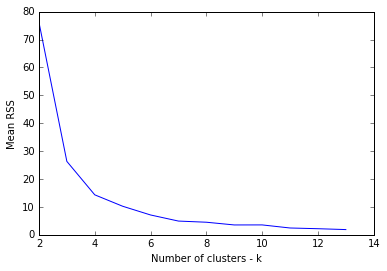

In [209]:
elbow_clusters(X, k_ini, k_end);

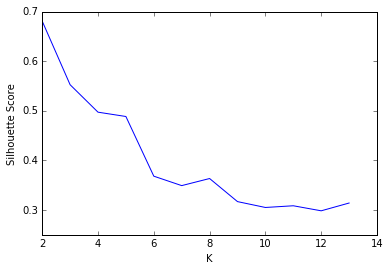

In [73]:
def silueta_score(clusters):
    k_means = KMeans(clusters)
    k_means.fit(X)
    silueta_score = []
    silueta_average = silhouette_score(X, k_means.labels_)
    return silueta_average

silue_score = [silueta_score(cluster) for cluster in range(k_ini, k_end)]
            
plt.plot(range(k_ini, k_end), silue_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score');              

### Kmeans_elo.py

In [155]:
X_3 = df.data[:, 1:3] # slicing first two features

In [156]:
km = K_means()
km.fit(X_3, 3, max_iter=100)
m = km.get_mean()
labels_3 = km.predict(X_3)

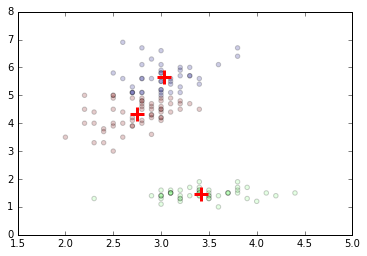

In [157]:
plt.scatter(X_3[:, 0], X_3[:, 1], c=labels_3, alpha=0.2)
plt.scatter(m[:, 0], m[:, 1], c='r', s=200, marker = '+', lw=3);

In [165]:
km_ = K_means()
km_.fit(X, 3, max_iter=100)
m_ = km_.get_mean()
labels = km.predict(X)

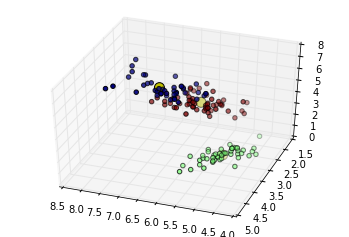

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], labels, c=labels_3)
ax.scatter(m_[:, 0], m_[:, 1], m_[:, 2], c='y', s=100)
ax.view_init(elev=40., azim=110);

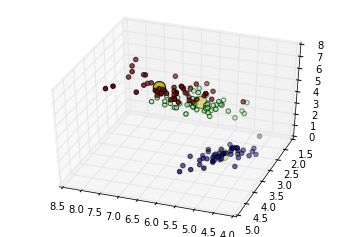

In [181]:
y = df.target
labels_ = y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], labels_, c=labels_)
ax.scatter(m_[:, 0], m_[:, 1], m_[:, 2], c='y', s=150)
ax.view_init(elev=40., azim=110)

In [129]:
X_, y_ = make_blobs(n_samples=500, 
                    n_features=2, 
                    centers=9, 
                    cluster_std=0.5, 
                    center_box=(-10.0, 10.0), 
                    shuffle= True)

kmeans = K_means()
kmeans.fit(X_, 8, max_iter=100)
means = kmeans.get_mean()
labels = kmeans.predict(X)

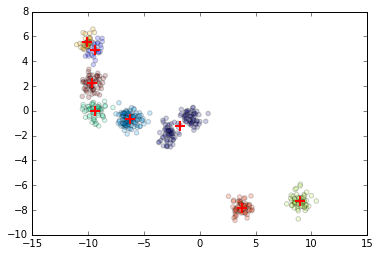

In [134]:
plt.scatter(X_[:,0], X_[:,1], c=labels, alpha=0.2)
plt.scatter(means[:,0], means[:,1], c='r', s=100, marker='+', lw=2);

### Sklearn

In [201]:
k_m = KMeans(3)
k_m.fit(X)
k_m.labels_
m__ = k_m.cluster_centers_

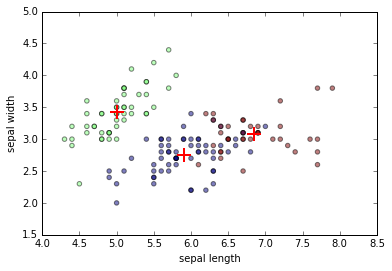

In [206]:
plt.scatter(X[:, 0], X[:, 1], c=k_m.labels_, alpha=.5)
plt.scatter(m__[:, 0], m__[:, 1], c='r', s=200, marker='+', lw=2)
plt.xlabel('sepal length')
plt.ylabel('sepal width');

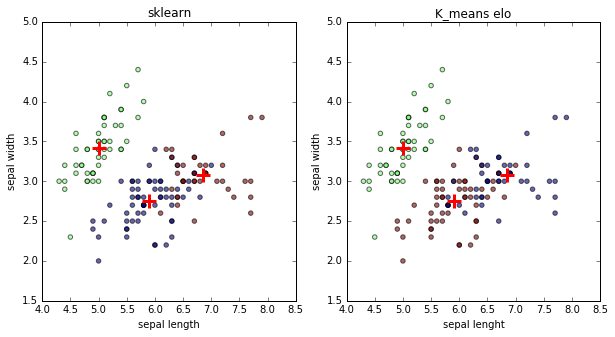

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=k_m.labels_, alpha=.6)
ax[0].scatter(m__[:, 0], m__[:, 1], c='r', s=200, marker = '+', lw=3)
ax[0].set_xlabel('sepal length')
ax[0].set_ylabel('sepal width')
ax[0].set_title('sklearn')

ax[1].scatter(X[:, 0], X[:, 1], c=labels, alpha=.6)
ax[1].scatter(m_[:, 0], m_[:, 1], c='r', s=200, marker = '+', lw=3)
ax[1].set_xlabel('sepal lenght')
ax[1].set_ylabel('sepal width')
ax[1].set_title('K_means elo');